In [1]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = os.getcwd()
SEED = 42

reset_seeds(SEED)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 선형 예측의 기초

선형 예측은 입력 변수와 출력 변수 간의 선형 관계를 모델링하는 방법입니다. 일반적으로 선형 회귀 모델을 사용하여 이 관계를 나타냅니다. 선형 회귀 모델은 다음과 같이 표현됩니다:

$$
y = w_1 x_1 + w_2 x_2 + b
$$

여기서:
- \(y\): 예측값 (출력 변수)
- \(x_1\), \(x_2\): 입력 변수 (독립 변수)
- \(w_1\), \(w_2\): 각 입력 변수에 대한 가중치
- \(b\): 편향 (bias)

### 예시 데이터

가상의 데이터셋을 통해 선형 예측을 설명하겠습니다. 다음과 같은 데이터가 있다고 가정합니다:

| Input 1 (x₁) | Input 2 (x₂) | Target Output (y) |
|---------------|---------------|--------------------|
| 1             | 2             | 3                  |
| 2             | 3             | 5                  |
| 3             | 4             | 7                  |
| 4             | 5             | 9                  |
| 5             | 6             | 11                 |

### 선형 모델 구축

이 데이터셋을 사용하여 선형 회귀 모델을 학습시키면 다음과 같은 관계를 발견할 수 있습니다:

$$
y = 1 x_1 + 1 x_2 + 1
$$

이 모델은 다음과 같이 해석할 수 있습니다:
- 입력 변수 \(x_1\)와 \(x_2\)가 각각 1의 가중치를 가지며, 편향 \(b\)는 1입니다.
- 즉, 두 입력 변수의 합에 1을 더한 값이 예측값 \(y\)입니다.

### 예측

이 모델을 사용하여 새로운 입력 \(x_1 = 6\) 및 \(x_2 = 7\)에 대해 예측해보면:

$$
y = 1 \cdot 6 + 1 \cdot 7 + 1 = 14
$$

따라서 예측값은 14가 됩니다.

### 결론

선형 예측은 데이터의 두 변수 간의 관계를 이해하고, 이를 기반으로 새로운 값을 예측하는 데 유용합니다. 이러한 방식은 다양한 분야에서 기본적인 예측 기법으로 사용됩니다.


## 논리 회로 구현

## 1. AND 게이트
설명:
AND 게이트는 두 입력이 모두 1일 때만 출력이 1이 되는 논리 게이트입니다. 즉, x1과 x2가 모두 참(1)일 때만 참(1)을 반환합니다.

In [2]:
import numpy as np

def AND(i, x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    print(f"Intermediate result for input {i} ({x1}, {x2}): {tmp}")
    
    if tmp <= 0:
        return 0
    else:
        return 1
    
if __name__ == '__main__':
    for i, xs in enumerate([(0, 0), (1, 0), (0, 1), (1, 1)]):
        y = AND(i, xs[0], xs[1])
        print(f"Final output for input {xs}: {y}")
        print("==============")


Intermediate result for input 0 (0, 0): -0.7
Final output for input (0, 0): 0
Intermediate result for input 1 (1, 0): -0.19999999999999996
Final output for input (1, 0): 0
Intermediate result for input 2 (0, 1): -0.19999999999999996
Final output for input (0, 1): 0
Intermediate result for input 3 (1, 1): 0.30000000000000004
Final output for input (1, 1): 1


## 2. or 게이트
설명:
OR 게이트는 두 입력 중 하나라도 1이면 출력이 1이 되는 논리 게이트입니다. 즉, x1 또는 x2 중 하나라도 참(1)이면 참(1)을 반환합니다.

In [3]:
import numpy as np

def OR(i, x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    print(f"Intermediate result for input {i} ({x1}, {x2}): {tmp}")
    if tmp <= 0:
        return 0
    else:
        return 1
    
if __name__ == '__main__':
    for i, xs in enumerate([(0, 0), (1, 0), (0, 1), (1, 1)]):
        y = OR(i, xs[0], xs[1])
        print(f"Final output for input {xs}: {y}")
        print("==============")


Intermediate result for input 0 (0, 0): -0.2
Final output for input (0, 0): 0
Intermediate result for input 1 (1, 0): 0.3
Final output for input (1, 0): 1
Intermediate result for input 2 (0, 1): 0.3
Final output for input (0, 1): 1
Intermediate result for input 3 (1, 1): 0.8
Final output for input (1, 1): 1


## 3. NAND 게이트
설명:
NAND 게이트는 AND 게이트의 출력에 NOT 연산을 적용한 것입니다. 즉, 두 입력이 모두 1일 때만 출력이 0이 되고, 그 외의 경우에는 출력이 1이 됩니다.

In [4]:
import numpy as np

def NAND(i, x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    print(f"Intermediate result for input {i} ({x1}, {x2}): {tmp}")
    if tmp <= 0:
        return 0
    else:
        return 1
    
if __name__ == '__main__':
    for i, xs in enumerate([(0, 0), (1, 0), (0, 1), (1, 1)]):
        y = NAND(i, xs[0], xs[1])
        print(f"Final output for input {xs}: {y}")
        print("==============")


Intermediate result for input 0 (0, 0): 0.7
Final output for input (0, 0): 1
Intermediate result for input 1 (1, 0): 0.19999999999999996
Final output for input (1, 0): 1
Intermediate result for input 2 (0, 1): 0.19999999999999996
Final output for input (0, 1): 1
Intermediate result for input 3 (1, 1): -0.30000000000000004
Final output for input (1, 1): 0


## 4. NOR 게이트
설명:
NOR 게이트는 OR 게이트의 출력에 NOT 연산을 적용한 것입니다. 즉, 두 입력이 모두 0일 때만 출력이 1이 되고, 그 외의 경우에는 출력이 0이 됩니다.

In [5]:
import numpy as np

def NOR(i, x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.2
    tmp = np.sum(w*x) + b
    print(f"Intermediate result for input {i} ({x1}, {x2}): {tmp}")
    if tmp <= 0:
        return 0
    else:
        return 1
    
if __name__ == '__main__':
    for i, xs in enumerate([(0, 0), (1, 0), (0, 1), (1, 1)]):
        y = NOR(i, xs[0], xs[1])
        print(f"Final output for input {xs}: {y}")
        print("==============")


Intermediate result for input 0 (0, 0): 0.2
Final output for input (0, 0): 1
Intermediate result for input 1 (1, 0): -0.3
Final output for input (1, 0): 0
Intermediate result for input 2 (0, 1): -0.3
Final output for input (0, 1): 0
Intermediate result for input 3 (1, 1): -0.8
Final output for input (1, 1): 0


## XOR 논리 게이트의 구현 과정

XOR 게이트는 간단한 논리 게이트인 NAND, OR, AND 게이트를 조합하여 구현됩니다. 각 논리 게이트의 계산 과정을 수식으로 표현하면 다음과 같습니다.

### 1. NAND 게이트

NAND 게이트는 다음과 같이 입력 두 개 $x_1, x_2$에 대해 계산됩니다.  
가중치 $w_1 = w_2 = -0.5$, 편향 $b = 0.7$로 설정됩니다.

$$
\text{NAND}(x_1, x_2) = 
\begin{cases} 
1 & \text{if } w_1 \cdot x_1 + w_2 \cdot x_2 + b > 0 \\
0 & \text{otherwise}
\end{cases}
$$

즉, $x_1$과 $x_2$가 모두 1인 경우를 제외한 나머지 경우에는 1을 출력합니다.

### 2. OR 게이트

OR 게이트는 입력 두 개 $x_1, x_2$에 대해 계산됩니다.  
가중치 $w_1 = w_2 = 0.5$, 편향 $b = -0.2$로 설정됩니다.

$$
\text{OR}(x_1, x_2) = 
\begin{cases} 
1 & \text{if } w_1 \cdot x_1 + w_2 \cdot x_2 + b > 0 \\
0 & \text{otherwise}
\end{cases}
$$

즉, $x_1$ 또는 $x_2$ 중 하나라도 1인 경우 1을 출력합니다.

### 3. AND 게이트

AND 게이트는 입력 두 개 $x_1, x_2$에 대해 계산됩니다.  
가중치 $w_1 = w_2 = 0.5$, 편향 $b = -0.7$로 설정됩니다.

$$
\text{AND}(x_1, x_2) = 
\begin{cases} 
1 & \text{if } w_1 \cdot x_1 + w_2 \cdot x_2 + b > 0 \\
0 & \text{otherwise}
\end{cases}
$$

즉, $x_1$과 $x_2$가 모두 1인 경우에만 1을 출력합니다.

### 4. XOR 게이트

XOR 게이트는 앞서 구현한 NAND, OR, AND 게이트를 조합하여 다음과 같이 계산됩니다.

1. **NAND 결과 계산**:  
   $$
   s_1 = \text{NAND}(x_1, x_2)
   $$

2. **OR 결과 계산**:  
   $$
   s_2 = \text{OR}(x_1, x_2)
   $$

3. **최종 AND 계산 (XOR 출력)**:  
   $$
   y = \text{AND}(s_1, s_2)
   $$

따라서 XOR 게이트는 $x_1$과 $x_2$가 다를 때만 1을 출력하게 됩니다.

### 5. 예시 계산

- $x_1 = 0, x_2 = 0$:  
  $$
  s_1 = \text{NAND}(0, 0) = 1, \quad s_2 = \text{OR}(0, 0) = 0, \quad y = \text{AND}(1, 0) = 0
  $$

- $x_1 = 1, x_2 = 0$:  
  $$
  s_1 = \text{NAND}(1, 0) = 1, \quad s_2 = \text{OR}(1, 0) = 1, \quad y = \text{AND}(1, 1) = 1
  $$

- $x_1 = 0, x_2 = 1$:  
  $$
  s_1 = \text{NAND}(0, 1) = 1, \quad s_2 = \text{OR}(0, 1) = 1, \quad y = \text{AND}(1, 1) = 1
  $$

- $x_1 = 1, x_2 = 1$:  
  $$
  s_1 = \text{NAND}(1, 1) = 0, \quad s_2 = \text{OR}(1, 1) = 1, \quad y = \text{AND}(0, 1) = 0
  $$

따라서 XOR 게이트는 입력 $x_1$과 $x_2$가 같을 때는 0을, 다를 때는 1을 출력합니다.


In [6]:
import numpy as np

def NAND(i, x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    return 1 if tmp > 0 else 0

def OR(i, x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    return 1 if tmp > 0 else 0

def AND(i, x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    return 1 if tmp > 0 else 0

def XOR(i, x1, x2):
    s1 = NAND(i, x1, x2)
    s2 = OR(i, x1, x2)
    y = AND(i, s1, s2)
    print(f"Intermediate result for input {i} ({x1}, {x2}): NAND = {s1}, OR = {s2}, AND = {y}")
    return y
    
if __name__ == '__main__':
    for i, xs in enumerate([(0, 0), (1, 0), (0, 1), (1, 1)]):
        y = XOR(i, xs[0], xs[1])
        print(f"Final output for input {xs}: {y}")
        print("==============")


Intermediate result for input 0 (0, 0): NAND = 1, OR = 0, AND = 0
Final output for input (0, 0): 0
Intermediate result for input 1 (1, 0): NAND = 1, OR = 1, AND = 1
Final output for input (1, 0): 1
Intermediate result for input 2 (0, 1): NAND = 1, OR = 1, AND = 1
Final output for input (0, 1): 1
Intermediate result for input 3 (1, 1): NAND = 0, OR = 1, AND = 0
Final output for input (1, 1): 0


## step function

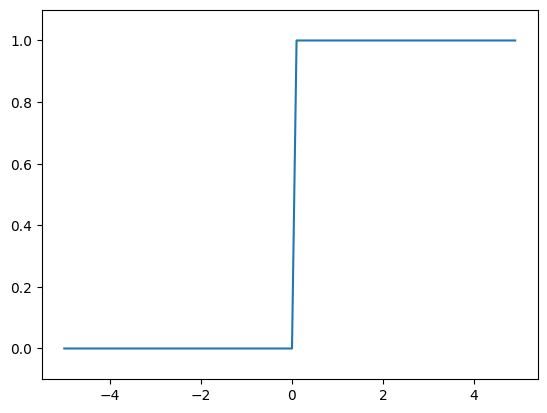

In [7]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int64)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()


## sigmoid function

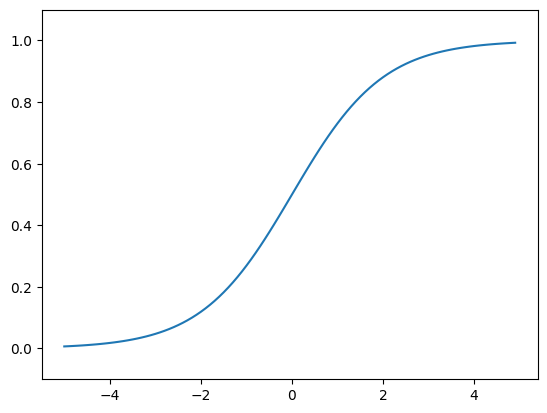

In [8]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()


## ReLu function

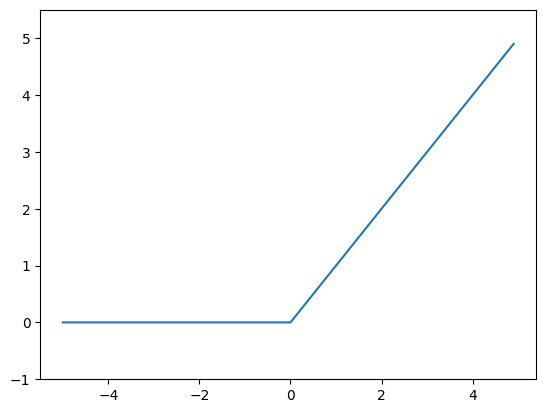

In [9]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()


## 내적과 행렬

### 내적 (Dot Product)

내적은 두 벡터 간의 연산으로, 두 벡터의 대응하는 성분을 곱한 후 모두 더한 값입니다.  
예를 들어, 두 벡터 
$$
\mathbf{a} = [a_1, a_2, \ldots, a_n]
$$
와 
$$
\mathbf{b} = [b_1, b_2, \ldots, b_n]
$$
의 내적은 다음과 같이 계산됩니다:
$$
\mathbf{a} \cdot \mathbf{b} = a_1 b_1 + a_2 b_2 + \cdots + a_n b_n
$$
결과는 하나의 숫자(스칼라)입니다.

### 행렬곱 (Matrix Multiplication)

행렬곱은 두 행렬 간의 연산으로, 첫 번째 행렬의 행(row)과 두 번째 행렬의 열(column)의 내적을 계산하여 새로운 행렬을 만드는 과정입니다.  
예를 들어, 
$$
\mathbf{A} =
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
$$
가 $2 \times 2$ 행렬이고, 
$$
\mathbf{B} =
\begin{bmatrix}
5 & 6 \\
7 & 8
\end{bmatrix}
$$
가 $2 \times 2$ 행렬일 때, 
$$
\mathbf{C} = \mathbf{A} \cdot \mathbf{B}
$$
의 계산은 다음과 같이 이루어집니다:

$$
\mathbf{C} =
\begin{bmatrix}
c_{11} & c_{12} \\
c_{21} & c_{22}
\end{bmatrix}
=
\begin{bmatrix}
1 \cdot 5 + 2 \cdot 7 & 1 \cdot 6 + 2 \cdot 8 \\
3 \cdot 5 + 4 \cdot 7 & 3 \cdot 6 + 4 \cdot 8
\end{bmatrix}
=
\begin{bmatrix}
19 & 22 \\
43 & 50
\end{bmatrix}
$$

따라서, 
$$
\mathbf{C} =
\begin{bmatrix}
19 & 22 \\
43 & 50
\end{bmatrix}
$$
이 됩니다.


In [10]:
a,b=np.array([[1,2],[3,4]]),np.array([[5,6],[7,8]])
a@b

array([[19, 22],
       [43, 50]])

In [15]:
from common.functions import*
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)

print(f"{x.shape} -> {network["W1"].shape}->{network["W2"].shape}->{network["W3"].shape}")
print(y)  # [0.31682708 0.69627909]

(2,) -> (2, 3)->(3, 2)->(2, 2)
[0.31682708 0.69627909]


## 소프트맥스 함수 (Softmax Function)

소프트맥스 함수는 주어진 벡터의 요소를 확률로 변환하는 함수입니다. 주로 다중 클래스 분류 문제에서 사용됩니다. 

주어진 입력 벡터 $\mathbf{z} = [z_1, z_2, \ldots, z_K]$에 대해, 소프트맥스 함수는 다음과 같이 정의됩니다:

$$
\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} \quad (i = 1, 2, \ldots, K)
$$

```python
def softmax(a):
    c =np.max(a)
    exp_a=np.exp(a-c)
    sum_exp_a=np.sum(exp_a)
    return exp_a/sum_exp_a
 ```


여기서:
- $\sigma(\mathbf{z})_i$는 클래스 $i$에 대한 확률입니다.
- $K$는 클래스의 총 개수입니다.
- $e$는 자연 상수 (약 2.718)입니다.

### 소프트맥스의 특징

1. **출력 확률**: 소프트맥스 함수의 출력은 항상 0과 1 사이의 값을 가지며, 모든 출력 값의 합은 1이 됩니다.
   $$
   \sum_{i=1}^{K} \sigma(\mathbf{z})_i = 1
   $$

2. **지수 함수의 사용**: 지수 함수를 사용함으로써, 입력 벡터의 상대적인 차이를 강조하여 더 큰 값에 더 높은 확률을 부여합니다.

### 예시

예를 들어, 입력 벡터 $\mathbf{z} = [2.0, 1.0, 0.1]$가 주어졌을 때, 소프트맥스를 적용하면:

1. 지수 계산:
   $$
   e^{2.0} \approx 7.389, \quad e^{1.0} \approx 2.718, \quad e^{0.1} \approx 1.105
   $$
   
2. 총합 계산:
   $$
   \sum_{j=1}^{3} e^{z_j} \approx 7.389 + 2.718 + 1.105 \approx 11.212
   $$

3. 각 클래스에 대한 확률 계산:
   $$
   \sigma(\mathbf{z})_1 = \frac{e^{2.0}}{11.212} \approx 0.659
   $$
   $$
   \sigma(\mathbf{z})_2 = \frac{e^{1.0}}{11.212} \approx 0.242
   $$
   $$
   \sigma(\mathbf{z})_3 = \frac{e^{0.1}}{11.212} \approx 0.099
   $$

따라서, 소프트맥스 함수의 결과는 약 $[0.659, 0.242, 0.099]$가 됩니다.


In [16]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

softmax(np.array([0.3,2.9,4.0])),np.sum(softmax(np.array([0.3,2.9,4.0])))

(array([0.01821127, 0.24519181, 0.73659691]), 1.0)

## 간단한 신경망 추론

In [17]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]: # 예측값과 i번재 t 정답값이 같다면
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


## 배치단위 처리

In [18]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0
count=0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    while i<=5:
        print(f"{i}: p: {p},target{t[i:i+batch_size]} \n")
        break

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

0: p: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 6 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 2 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 4 3 1 4 1 7 6 9],target[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9] 

Accuracy:0.9352


## Loss function

### 1. Mean Squared Error (MSE)

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

- $( y_i $): 실제 값 (True value)
- $( \hat{y}_i $): 예측 값 (Predicted value)
- $( N $): 데이터 포인트의 수 (Number of data points)

In [19]:
import numpy as np
def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

t = [0,0,1,0,0,0,0,0,0,0] # 정답은 2
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0] # 2일 확률이 가장 높다고 추정함

print(mean_squared_error(np.array(y),np.array(t))) # 0.0975

y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0] # 7일 확률이 가장 높다고 추정함
print(mean_squared_error(np.array(y),np.array(t))) # 0.5975

0.09750000000000003
0.5975


### 2. Cross Entropy Error

이진 분류의 경우:

$$
\text{Cross Entropy Error} = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

- $( y_i $): 실제 레이블 (True label, 0 또는 1)
- $( \hat{y}_i $): 예측 확률 (Predicted probability)
- $( N $): 데이터 포인트의 수

In [20]:
def cross_entropy_error(y,t):
    delta = 1e-7 # log0을 방지하기 위해 아주 작은 값을 더함
    return -np.sum(t*np.log(y+delta))

t = [0,0,1,0,0,0,0,0,0,0] # 정답은 2
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0] # 2일 확률이 가장 높다고 추정함
print(cross_entropy_error(np.array(y),np.array(t))) # 0.510825457099

y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0] # 7일 확률이 가장 높다고 추정함
print(cross_entropy_error(np.array(y),np.array(t))) # 2.30258409299

0.510825457099338
2.302584092994546


## (배치용) 교차 엔트로피 오차 구현하기

In [22]:
def cross_entropy_error(y,t):
    if y.ndim == 1: # 1차원이라면
        t = t.reshape(1,t.size) # 2차원으로 변환
        y = y.reshape(1,y.size)
        print(t,y)

    batch_size = y.shape[0] # y의 행의 개수
    print(t*np.log(y+1e-7))
    return -np.sum(t*np.log(y+1e-7))/batch_size

In [23]:
t=np.array(
    [0.2, 0.6, 0.2])
np.array(
    [0.2, 0.6, 0.2]).reshape(1,t.size)

array([[0.2, 0.6, 0.2]])

In [24]:
t = [0,0,1,0,0,0,0,0,0,0] # 정답은 2
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0] # 2일 확률이 가장 높다고 추정함
print(cross_entropy_error(np.array(y),np.array(t)))

[[0 0 1 0 0 0 0 0 0 0]] [[0.1  0.05 0.6  0.   0.05 0.1  0.   0.1  0.   0.  ]]
[[-0.         -0.         -0.51082546 -0.         -0.         -0.
  -0.         -0.         -0.         -0.        ]]
0.510825457099338


In [25]:
import numpy as np

# 예측값 (확률 분포)
y = np.array([
    [0.2, 0.6, 0.2],  # 첫 번째 샘플 예측 확률
    [0.1, 0.8, 0.1],  # 두 번째 샘플 예측 확률
    [0.7, 0.2, 0.1]   # 세 번째 샘플 예측 확률
])

# 정답 라벨 (원-핫 인코딩)
t = np.array([
    [0, 1, 0],  # 첫 번째 샘플의 실제 라벨 (1번 클래스)
    [0, 1, 0],  # 두 번째 샘플의 실제 라벨 (1번 클래스)
    [1, 0, 0]   # 세 번째 샘플의 실제 라벨 (0번 클래스)
])


# 교차 엔트로피 손실 계산
loss = cross_entropy_error(y, t)
print(f"Cross-Entropy Loss: {loss}")


[[-0.         -0.51082546 -0.        ]
 [-0.         -0.22314343 -0.        ]
 [-0.3566748  -0.         -0.        ]]
Cross-Entropy Loss: 0.3635478948317185


In [26]:
def cross_entropy_error(y,t): # 정답 레이블이 원-핫 인코딩이 아닌 숫자 레이블로 주어졌을 때
    if y.ndim == 1: # 1차원이라면
        t = t.reshape(1,t.size) # 2차원으로 변환
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0] # y의 행의 개수
    print(y[np.arange(batch_size),t])
    print(y[np.arange(batch_size),t]+1e-7)

    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size # 각 인덱스의 정답의 신호를 추출

In [27]:
import numpy as np

# 예측값 (확률 분포)
y = np.array([
    [0.2, 0.6, 0.2],  # 첫 번째 샘플 예측 확률
    [0.1, 0.8, 0.1],  # 두 번째 샘플 예측 확률
    [0.7, 0.2, 0.1]   # 세 번째 샘플 예측 확률
])

# 정답 라벨 (클래스 번호)
t = np.array([1, 1, 0])  
# 첫 번째와 두 번째 샘플의 정답은 클래스 1, 세 번째 샘플의 정답은 클래스 0
# array([0.6, 0.8, 0.7])

# 교차 엔트로피 손실 계산
loss = cross_entropy_error(y, t)
print(f"Cross-Entropy Loss: {loss}")


[0.6 0.8 0.7]
[0.6000001 0.8000001 0.7000001]
Cross-Entropy Loss: 0.3635478948317185


In [28]:
import numpy as np

# 활성화 함수 ReLU 정의
def relu(x):
    return np.maximum(0, x)

# 선형 변환 함수 (fully connected layer)
def linear(x, weight, bias=0):
    return np.dot(x, weight) + bias

# 간단한 신경망 정의 (파라미터는 딕셔너리로 저장)
class SimpleNN:
    def __init__(self, input_size=2, hidden_size=4, output_size=1):
        # 가중치 및 편향 정의 (NumPy 배열 사용)
        self.params = {
            'fc1_weight': np.random.randn(input_size, hidden_size),
            'fc_bias': np.random.randn(hidden_size),
            'outputs': np.random.randn(hidden_size,output_size)
            
            # 출력 레이어가 필요하다면 여기에 추가 가능
            # 'fc2_weight': np.random.randn(hidden_size, output_size),
            # 'fc2_bias': np.random.randn(output_size)
        }
    
    def forward(self, x):
        # 첫 번째 레이어 선형 변환 및 ReLU 적용
        x = linear(x, self.params['fc1_weight'], self.params['fc_bias'])

        print(x.shape)

        x = relu(x)

        print(f"activate fun : {x.shape}")

        x = linear(x, self.params['outputs']) # 브로드 캐스팅 주의

        print(x.shape)

        # 만약 출력 레이어를 추가하고 싶다면 아래처럼 적용
        # x = linear(x, self.params['fc2_weight'], self.params['fc2_bias'])
        # x = relu(x) 또는 x = 다른 활성화 함수

        return x

# 신경망 초기화 및 임의의 입력 생성
net = SimpleNN()
x = np.random.randn(2, 2)  # 1x2 크기의 임의의 입력
output = net.forward(x)

print("Output: ", output)


(2, 4)
activate fun : (2, 4)
(2, 1)
Output:  [[-1.16522884]
 [-1.91094575]]


## 단순 신경망(+손실함수)

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 간단한 신경망 정의
class SimpleNN(nn.Module):
    def __init__(self, input_size=2, hidden_size=4, output_size=3):  # 다중 클래스 분류를 위해 output_size=3
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # 첫 번째 레이어에 ReLU 적용
        x = self.output(x)       # 출력 레이어 (3개의 클래스로 출력)
        return x

# 네트워크 초기화 및 임의의 입력
net = SimpleNN()
x = torch.randn(4, 2)  # 입력 데이터 (4x2)

# 모델의 출력 계산 (Logits 출력)
logits = net(x)
print("Logits: ", logits)

# Softmax 적용하여 확률값으로 변환
softmax_output = F.softmax(logits, dim=1)
print("Softmax Output: ", softmax_output)

# 임시 정답(타겟) 설정 (정답 레이블은 클래스 인덱스로 표현, 0, 1, 2 중 하나)
target = torch.tensor([0, 2, 1, 0])  # 임의의 정답 레이블 (4개의 샘플에 대해)

# CrossEntropyLoss 손실 함수 정의
loss_fn = nn.CrossEntropyLoss()

# 오차(손실) 계산
loss = loss_fn(logits, target)  # CrossEntropyLoss는 Softmax를 내부적으로 적용하므로 logits 사용
print("Loss: ", loss)


Logits:  tensor([[-0.1143, -0.2135, -0.3065],
        [-0.2449, -0.3653, -0.2204],
        [-0.1306, -0.2288, -0.2209],
        [-0.3168, -0.3060, -0.2068]], grad_fn=<AddmmBackward0>)
Softmax Output:  tensor([[0.3662, 0.3316, 0.3022],
        [0.3435, 0.3045, 0.3520],
        [0.3546, 0.3214, 0.3240],
        [0.3198, 0.3233, 0.3569]], grad_fn=<SoftmaxBackward0>)
Loss:  tensor(1.0809, grad_fn=<NllLossBackward0>)


## 활성화 함수 (Activation Functions)

활성화 함수는 인공 신경망의 뉴런에서 입력 신호를 출력 신호로 변환하는 역할을 합니다. 이 함수는 비선형성을 모델에 추가하여 신경망이 복잡한 관계를 학습할 수 있도록 합니다.

### 주요 활성화 함수

1. **시그모이드 함수 (Sigmoid Function)**

   시그모이드 함수는 다음과 같이 정의됩니다:
   $$
   \sigma(x) = \frac{1}{1 + e^{-x}}
   $$
   - 출력 범위: (0, 1)
   - 주로 이진 분류 문제의 출력층에서 사용됩니다.
   - 단점: 기울기 소실 문제(vanishing gradient problem)가 발생할 수 있습니다.

2. **하이퍼볼릭 탄젠트 함수 (Tanh Function)**

   하이퍼볼릭 탄젠트 함수는 다음과 같이 정의됩니다:
   $$
   \tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
   $$
   - 출력 범위: (-1, 1)
   - 시그모이드 함수보다 중앙에 위치해 있어 더 빠르게 수렴합니다.
   - 여전히 기울기 소실 문제에 취약합니다.

3. **ReLU 함수 (Rectified Linear Unit)**

   ReLU 함수는 다음과 같이 정의됩니다:
   $$
   \text{ReLU}(x) = \max(0, x)
   $$
   - 출력 범위: [0, ∞)
   - 비선형성을 유지하면서 계산이 간단합니다.
   - 문제점: 죽은 ReLU 문제 (Dying ReLU problem)로, 뉴런이 학습 중에 0을 출력하게 되어 더 이상 활성화되지 않는 상황이 발생할 수 있습니다.

4. **소프트맥스 함수 (Softmax Function)**

   소프트맥스 함수는 다중 클래스 분류 문제의 출력층에서 사용되며, 다음과 같이 정의됩니다:
   $$
   \sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} \quad (i = 1, 2, \ldots, K)
   $$
   - 출력 범위: (0, 1)이며, 모든 출력 값의 합은 1입니다.
   - 각 클래스에 대한 확률을 제공합니다.

### 활성화 함수의 중요성

활성화 함수는 신경망이 복잡한 패턴과 비선형 관계를 학습하는 데 필수적입니다. 적절한 활성화 함수를 선택함으로써 모델의 성능을 크게 향상시킬 수 있습니다.


c:\Users\hopio\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


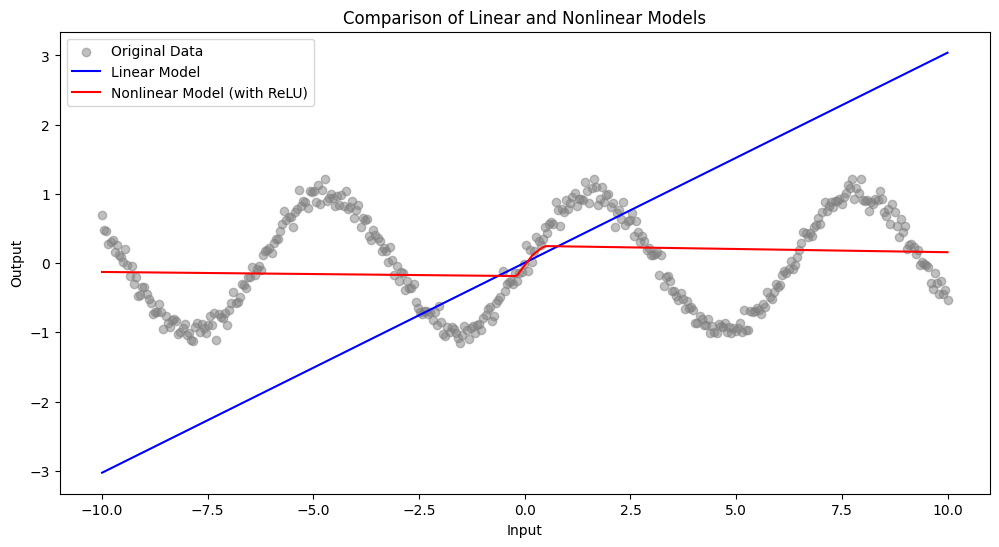

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# 데이터 생성 (간단한 2D 데이터를 사용합니다)
x = np.linspace(-10, 10, 400)
y = np.sin(x) + np.random.normal(0, 0.1, x.shape)

# 선형 신경망 모델
linear_model = Sequential([
    Dense(1, input_shape=(1,), activation=None)  # 활성화 함수 없음
])

# 비선형 신경망 모델 (ReLU 사용)
nonlinear_model = Sequential([
    Dense(10, input_shape=(1,), activation='relu'),
    Dense(1)  # 기본적으로 선형 출력
])

# 모델 컴파일
linear_model.compile(optimizer='adam', loss='mse')
nonlinear_model.compile(optimizer='adam', loss='mse')

# 모델 학습
linear_model.fit(x, y, epochs=100, verbose=0)
nonlinear_model.fit(x, y, epochs=100, verbose=0)

# 예측
y_linear_pred = linear_model.predict(x)
y_nonlinear_pred = nonlinear_model.predict(x)

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 원래 데이터
plt.scatter(x, y, label='Original Data', color='gray', alpha=0.5)

# 선형 모델의 결과
plt.plot(x, y_linear_pred, label='Linear Model', color='blue')

# 비선형 모델의 결과
plt.plot(x, y_nonlinear_pred, label='Nonlinear Model (with ReLU)', color='red')

plt.title('Comparison of Linear and Nonlinear Models')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()


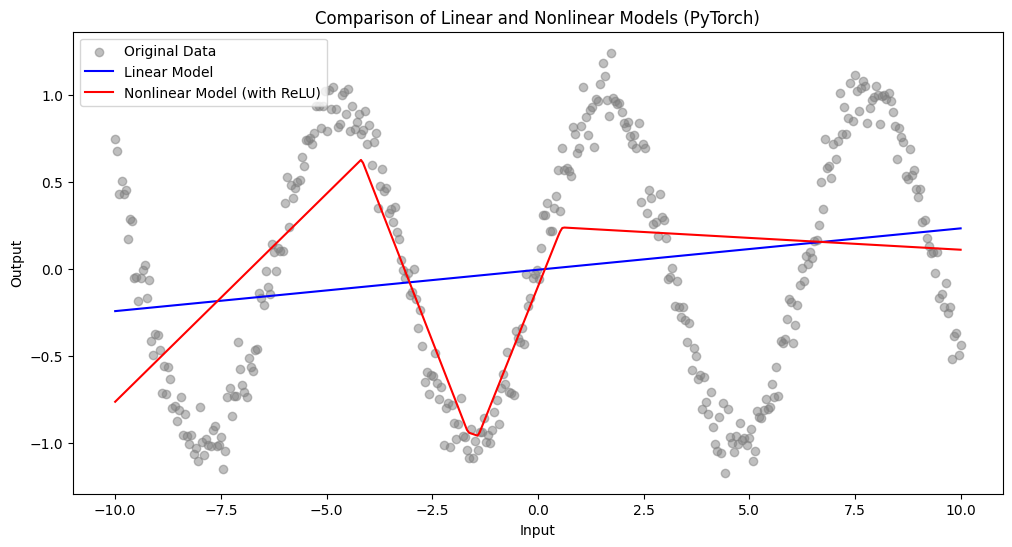

In [13]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
x = np.linspace(-10, 10, 400)
y = np.sin(x) + np.random.normal(0, 0.1, x.shape)

# 파이토치 텐서로 변환
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# 선형 신경망 모델
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 입력과 출력이 1차원, 활성화 함수 없음

    def forward(self, x):
        return self.linear(x)

# 비선형 신경망 모델 (ReLU 사용)
class NonlinearModel(nn.Module):
    def __init__(self):
        super(NonlinearModel, self).__init__()
        self.hidden = nn.Linear(1, 10)  # 입력이 1차원, 출력이 10차원
        self.relu = nn.ReLU()           # ReLU 활성화 함수
        self.output = nn.Linear(10, 1)  # 최종 출력이 1차원

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# 모델 초기화
linear_model = LinearModel()
nonlinear_model = NonlinearModel()

# 손실 함수와 옵티마이저 정의
criterion = nn.MSELoss()
linear_optimizer = torch.optim.Adam(linear_model.parameters(), lr=0.01)
nonlinear_optimizer = torch.optim.Adam(nonlinear_model.parameters(), lr=0.01)

# 학습
epochs = 1000
for epoch in range(epochs):
    # 선형 모델 학습
    linear_optimizer.zero_grad()
    y_linear_pred = linear_model(x_tensor)
    linear_loss = criterion(y_linear_pred, y_tensor)
    linear_loss.backward()
    linear_optimizer.step()

    # 비선형 모델 학습
    nonlinear_optimizer.zero_grad()
    y_nonlinear_pred = nonlinear_model(x_tensor)
    nonlinear_loss = criterion(y_nonlinear_pred, y_tensor)
    nonlinear_loss.backward()
    nonlinear_optimizer.step()

# 예측 결과
y_linear_pred = linear_model(x_tensor).detach().numpy()
y_nonlinear_pred = nonlinear_model(x_tensor).detach().numpy()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 원래 데이터
plt.scatter(x, y, label='Original Data', color='gray', alpha=0.5)

# 선형 모델의 결과
plt.plot(x, y_linear_pred, label='Linear Model', color='blue')

# 비선형 모델의 결과
plt.plot(x, y_nonlinear_pred, label='Nonlinear Model (with ReLU)', color='red')

plt.title('Comparison of Linear and Nonlinear Models (PyTorch)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()


In [18]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)


5
(784,)
(28, 28)


In [19]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    # (_, _), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    print(y)
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        print(p,t[i])
        accuracy_cnt += 1
    break
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


[8.4412648e-05 2.6350683e-06 7.1549520e-04 1.2586274e-03 1.1727966e-06
 4.4990895e-05 1.6269318e-08 9.9706501e-01 9.3744884e-06 8.1831234e-04]
7 7
Accuracy:0.0001


In [31]:
for k,v in sorted(network.items()):
    print(f"{k}--->{v.shape}","\n")


W1--->(784, 50) 

W2--->(50, 100) 

W3--->(100, 10) 

b1--->(50,) 

b2--->(100,) 

b3--->(10,) 



In [17]:
x,_=get_data()
x[0].shape,network['W1'].shape,network['W2'].shape,network['W3'].shape

((784,), (784, 50), (50, 100), (100, 10))

## 배치단위로 처리하는 단순 신경망

In [26]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

network

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
        -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
         0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
         0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
        -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
        -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
         0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
        -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
         0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
        -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
        -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
         0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
         0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
         0.02454282,  0.05875788,  0.08505439

In [28]:
t

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [27]:
batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x))) 

Accuracy:0.9352


## 딥러닝에서 손실 함수가 필요한 이유

딥러닝 모델은 주어진 입력 데이터에 대한 출력 예측을 수행하는데, 이 예측이 얼마나 정확한지를 측정하는 기준이 필요합니다. **손실 함수**(Loss Function)는 모델이 예측한 값과 실제 정답 값 간의 차이를 계산하는 함수로, 이 차이를 **오차** 또는 **손실**이라고 부릅니다.

### 손실 함수의 역할

1. **모델 성능 평가**:
   손실 함수는 모델의 예측이 얼마나 정확한지를 정량적으로 평가합니다. 예를 들어, 예측 값이 실제 값과 얼마나 차이가 나는지를 수치로 나타내므로, 모델이 학습하는 동안 얼마나 개선되고 있는지를 확인할 수 있습니다.

2. **모델 학습의 지표**:
   딥러닝 모델은 **오차 역전파**(Backpropagation) 알고리즘을 사용해 학습합니다. 이때, 손실 함수는 오차를 줄이기 위해 가중치와 편향을 어떻게 수정해야 할지 계산하는 데 중요한 역할을 합니다. 손실 값이 클수록 모델의 가중치와 편향을 크게 조정하고, 손실 값이 작을수록 조정을 적게 하는 방식으로 학습이 진행됩니다.

3. **최적화 목표**:
   딥러닝에서 학습의 목표는 손실 함수 값을 최소화하는 것입니다. 즉, 모델이 학습을 통해 손실을 줄이고, 궁극적으로는 정확한 예측을 할 수 있도록 가중치와 편향을 조정하는 것이 목적입니다. **최적화 알고리즘**(예: Gradient Descent)은 손실 함수 값을 최소화하는 방향으로 모델 파라미터를 업데이트합니다.

### 손실 함수의 종류

- **회귀 문제**: 예측 값이 연속적인 경우, 대표적인 손실 함수로 **평균 제곱 오차(MSE)**가 사용됩니다.  
  $$ L = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2 $$

- **분류 문제**: 예측 값이 범주형 데이터인 경우, **교차 엔트로피 손실 함수**(Cross-Entropy Loss)가 사용됩니다.  
  $$ L = - \sum_{i=1}^{N} y_i \log(\hat{y_i}) $$

### 결론

손실 함수는 딥러닝 모델의 학습 과정에서 매우 중요한 역할을 합니다. 모델의 예측이 얼마나 정확한지 측정하고, 그 정보를 바탕으로 가중치와 편향을 조정하여 더 나은 예측을 할 수 있도록 학습을 도와줍니다. 따라서, 손실 함수를 잘 정의하는 것은 딥러닝 모델의 성능에 큰 영향을 미칩니다.


## 딥러닝에서 미분이 중요한 이유

딥러닝의 핵심은 **모델을 학습**시키는 과정인데, 이 학습 과정에서 미분은 매우 중요한 역할을 합니다. 딥러닝 모델은 주로 **손실 함수**를 최소화하기 위해 **경사 하강법(Gradient Descent)** 같은 최적화 알고리즘을 사용하여 모델의 가중치와 편향을 업데이트합니다. 이때 **미분**이 중요한 이유는 다음과 같습니다:

### 1. 기울기 계산을 통해 손실을 줄이는 방향 결정
모델의 **손실 함수**는 현재 모델의 예측값과 실제 값 간의 차이를 나타냅니다. 손실을 줄이기 위해 **가중치**와 **편향**을 조정해야 하는데, 이때 미분을 사용하여 가중치를 업데이트할 방향을 결정합니다.
- **기울기(Gradient)**는 손실 함수의 미분값으로, 현재 지점에서 손실 함수의 변화율을 나타냅니다.
- 기울기가 양수이면 가중치를 줄여야 하고, 음수이면 가중치를 늘려야 합니다. 이렇게 손실을 줄이는 방향을 찾아내기 위해 미분을 사용합니다.

### 2. 학습 과정의 최적화
경사 하강법 같은 알고리즘은 반복적으로 가중치와 편향을 업데이트하면서 최적의 값을 찾습니다. 매 반복마다 **미분**을 사용해 손실 함수의 기울기를 계산하고, 이 기울기를 바탕으로 가중치가 조금씩 변화합니다. 이를 통해 모델은 점점 더 **손실을 최소화**하는 방향으로 학습됩니다.

### 3. 역전파(Backpropagation)에서의 사용
딥러닝에서 **역전파(Backpropagation)**는 미분을 기반으로 한 알고리즘입니다. 역전파는 출력에서부터 입력층까지 **기울기**를 역으로 전파하여 각 가중치에 대한 **편미분**을 계산합니다. 이를 통해 각 가중치가 손실 함수에 미치는 영향을 구체적으로 파악할 수 있고, 이를 바탕으로 가중치를 조정해 나갑니다.

### 결론
미분은 딥러닝 모델이 학습되는 과정에서 필수적인 요소입니다. **기울기**를 계산하고, 이를 바탕으로 **손실**을 줄이는 방향을 찾아내며, 최적화를 돕는 데 중요한 역할을 합니다. 결국, 미분이 없다면 딥러닝 모델은 제대로 학습할 수 없습니다.


In [29]:
import numpy as np

# 순방향 계산 함수
def forward(price, qty, tax_rate):
    total = price * qty
    tax = total * tax_rate
    final = total + tax
    return total, tax, final

# 역전파 계산 함수
def backward(price, qty, tax_rate, total, tax, final):
    # 미분값 계산
    d_final_d_total = 1
    d_final_d_tax = 1
    
    d_total_d_price = qty
    d_total_d_qty = price
    
    d_tax_d_total = tax_rate
    d_tax_d_rate = total
    
    # 미분값 계산
    d_final_d_price = d_final_d_total * d_total_d_price
    d_final_d_qty = d_final_d_total * d_total_d_qty
    d_final_d_rate = d_final_d_tax * d_tax_d_rate
    
    return d_final_d_price, d_final_d_qty, d_final_d_rate

# 값 설정
price = 100    # 개당 가격
qty = 2        # 구매 수량
tax_rate = 0.01  # 세금 비율

# 순방향 계산
total, tax, final = forward(price, qty, tax_rate)

# 역전파 계산
d_final_d_price, d_final_d_qty, d_final_d_rate = backward(price, qty, tax_rate, total, tax, final)

print(f"총 가격: {total}")
print(f"세금: {tax}")
print(f"최종 지불 금액: {final}")

print(f"d(최종 지불 금액)/d(개당 가격): {d_final_d_price}")
print(f"d(최종 지불 금액)/d(구매 수량): {d_final_d_qty}")
print(f"d(최종 지불 금액)/d(세금 비율): {d_final_d_rate}")


총 가격: 200
세금: 2.0
최종 지불 금액: 202.0
d(최종 지불 금액)/d(개당 가격): 2
d(최종 지불 금액)/d(구매 수량): 100
d(최종 지불 금액)/d(세금 비율): 200


![image.png](attachment:image.png)

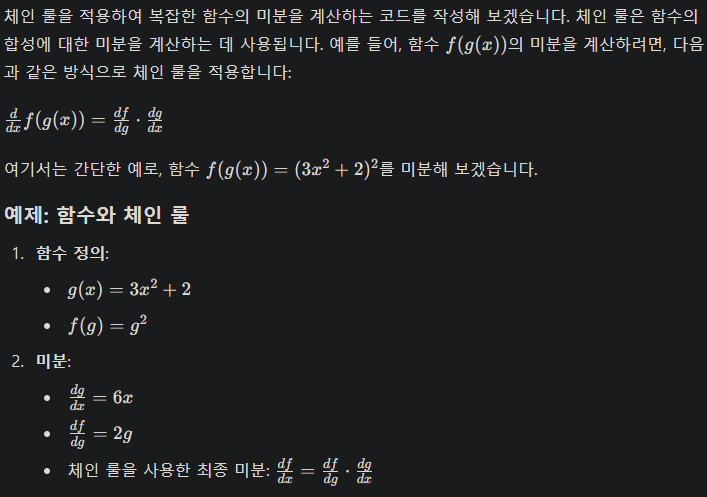

### 예제 코드

In [30]:
import numpy as np

# g(x) 함수
def g(x):
    return 3 * x**2 + 2

# f(g) 함수
def f(g):
    return g**2

# g(x)의 미분
def dg_dx(x):
    return 6 * x

# f(g)의 미분
def df_dg(g):
    return 2 * g

# 체인 룰을 사용한 최종 미분
def chain_rule(x):
    g_value = g(x)  # g(x) 계산
    dg_dx_value = dg_dx(x)  # g(x)의 미분
    df_dg_value = df_dg(g_value)  # f(g)의 미분
    
    # 체인 룰 적용
    df_dx = df_dg_value * dg_dx_value
    
    # 결과 출력
    print(f"g(x) = 3x^2 + 2")
    print(f"g({x}) = 3 * {x}^2 + 2 = {g_value}")
    
    print(f"\nDerivative of g(x):")
    print(f"dg/dx = 6 * {x} = {dg_dx_value}")
    
    print(f"\nDerivative of f(g):")
    print(f"df/dg = 2 * {g_value} = {df_dg_value}")
    
    print(f"\nApplying the chain rule:")
    print(f"df/dx = df/dg * dg/dx = {df_dg_value} * {dg_dx_value} = {df_dx}")
    
    return df_dx

# 테스트할 x 값
x = 5.0

# 체인 룰을 사용하여 미분 계산
df_dx = chain_rule(x)

print(f"\nAt x = {x}, d(f(g(x)))/d(x) = {df_dx}")


g(x) = 3x^2 + 2
g(5.0) = 3 * 5.0^2 + 2 = 77.0

Derivative of g(x):
dg/dx = 6 * 5.0 = 30.0

Derivative of f(g):
df/dg = 2 * 77.0 = 154.0

Applying the chain rule:
df/dx = df/dg * dg/dx = 154.0 * 30.0 = 4620.0

At x = 5.0, d(f(g(x)))/d(x) = 4620.0


결론
위의 계산과 해석이 정확합니다. 따라서, 코드와 계산 결과는 맞습니다. x가 1만큼 증가할 때 
𝑓
(
𝑔
(
𝑥
)
)
f(g(x))의 변화량이 4620이라는 해석도 정확합니다.


https://www.youtube.com/watch?v=DMCJ_GjBXwc

# 선형 회귀 모델의 오차 역전파 과정

## 모델 정의
선형 회귀 모델은 다음과 같이 정의됩니다:
$y = wx + b$
- $y$: 예측값
- $w$: 가중치
- $b$: 편향
- $x$: 입력 데이터

## 데이터
- 입력 $x = 2$
- 타겟 $y = 5$

## 1. 순전파 (Forward Pass)

1. **예측값 계산**
   - 가중치 $w$와 편향 $b$를 초기화합니다. 예를 들어 $w = 1$ 및 $b = 1$로 설정합니다.
   - 예측값 $\hat{y}$를 계산합니다:
     $$
     \hat{y} = wx + b = (1)(2) + 1 = 3
     $$

2. **손실 계산**
   - 손실 함수로 평균 제곱 오차 (MSE)를 사용합니다:
     $$
     \text{loss} = \frac{1}{2} (\hat{y} - y)^2 = \frac{1}{2} (3 - 5)^2 = \frac{1}{2} \times 4 = 2
     $$

## 2. 역전파 (Backward Pass)

역전파 과정에서는 손실을 줄이기 위해 가중치와 편향의 기울기를 계산하여 업데이트합니다.

1. **손실에 대한 예측값의 기울기 계산**
   $$
   \frac{\partial \text{loss}}{\partial \hat{y}} = \hat{y} - y = 3 - 5 = -2
   $$

2. **예측값에 대한 가중치의 기울기 계산**
   $$
   \frac{\partial \hat{y}}{\partial w} = x = 2
   $$
   $$
   \frac{\partial \hat{y}}{\partial b} = 1
   $$

3. **가중치와 편향에 대한 손실의 기울기 계산**
   $$
   \frac{\partial \text{loss}}{\partial w} = \frac{\partial \text{loss}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w} = -2 \cdot 2 = -4
   $$
   $$
   \frac{\partial \text{loss}}{\partial b} = \frac{\partial \text{loss}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial b} = -2 \cdot 1 = -2
   $$

4. **가중치와 편향 업데이트**
   - 학습률 $\eta$를 0.1로 설정합니다.
   $$
   w = w - \eta \cdot \frac{\partial \text{loss}}{\partial w} = 1 - 0.1 \cdot (-4) = 1 + 0.4 = 1.4
   $$
   $$
   b = b - \eta \cdot \frac{\partial \text{loss}}{\partial b} = 1 - 0.1 \cdot (-2) = 1 + 0.2 = 1.2
   $$

## 3. 결과
- 새로운 가중치와 편향을 사용하여 모델을 업데이트했습니다.
- 업데이트된 가중치 $w = 1.4$, 편향 $b = 1.2$를 사용하여 오차를 다시 계산합니다.
$$
\hat{y}_{new} = (1.4)(2) + 1.2 = 3.0 + 1.2 = 4.6
$$
$$
\text{new loss} = \frac{1}{2} (4.6 - 5)^2 = \frac{1}{2} \times 0.16 = 0.08
$$

이 과정을 통해 모델의 예측이 개선되고, 손실이 줄어드는 방향으로 가중치와 편향이 업데이트됩니다.

---

# 이차 함수의 오차 역전파 과정 (두 변수)

## 모델 정의
이차 함수 모델은 다음과 같이 정의됩니다:
$y = ax^2 + bx + c$
- $y$: 예측값
- $a$: 이차항의 계수
- $b$: 일차항의 계수
- $c$: 상수항
- $x$: 입력 데이터

## 데이터
- 입력 $x = 2$
- 타겟 $y = 8$

## 1. 순전파 (Forward Pass)

1. **예측값 계산**
   - 계수 $a$, $b$, $c$를 초기화합니다. 예를 들어 $a = 1$, $b = 1$, $c = 1$로 설정합니다.
   - 예측값 $\hat{y}$를 계산합니다:
     $$
     \hat{y} = ax^2 + bx + c = (1)(2^2) + (1)(2) + 1 = 4 + 2 + 1 = 7
     $$

2. **손실 계산**
   - 손실 함수로 평균 제곱 오차 (MSE)를 사용합니다:
     $$
     \text{loss} = \frac{1}{2} (\hat{y} - y)^2 = \frac{1}{2} (7 - 8)^2 = \frac{1}{2} \times 1 = 0.5
     $$

## 2. 역전파 (Backward Pass)

역전파 과정에서는 손실을 줄이기 위해 계수의 기울기를 계산하여 업데이트합니다.

1. **손실에 대한 예측값의 기울기 계산**
   $$
   \frac{\partial \text{loss}}{\partial \hat{y}} = \hat{y} - y = 7 - 8 = -1
   $$

2. **예측값에 대한 계수의 기울기 계산**
   $$
   \frac{\partial \hat{y}}{\partial a} = x^2 = 2^2 = 4
   $$
   $$
   \frac{\partial \hat{y}}{\partial b} = x = 2
   $$
   $$
   \frac{\partial \hat{y}}{\partial c} = 1
   $$

3. **계수에 대한 손실의 기울기 계산**
   $$
   \frac{\partial \text{loss}}{\partial a} = \frac{\partial \text{loss}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial a} = -1 \cdot 4 = -4
   $$
   $$
   \frac{\partial \text{loss}}{\partial b} = \frac{\partial \text{loss}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial b} = -1 \cdot 2 = -2
   $$
   $$
   \frac{\partial \text{loss}}{\partial c} = \frac{\partial \text{loss}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial c} = -1 \cdot 1 = -1
   $$

4. **계수 업데이트**
   - 학습률 $\eta$를 0.1로 설정합니다.
   $$
   a = a - \eta \cdot \frac{\partial \text{loss}}{\partial a} = 1 - 0.1 \cdot (-4) = 1 + 0.4 = 1.4
   $$
   $$
   b = b - \eta \cdot \frac{\partial \text{loss}}{\partial b} = 1 - 0.1 \cdot (-2) = 1 + 0.2 = 1.2
   $$
   $$
   c = c - \eta \cdot \frac{\partial \text{loss}}{\partial c} = 1 - 0.1 \cdot (-1) = 1 + 0.1 = 1.1
   $$

## 3. 결과
- 새로운 계수를 사용하여 모델을 업데이트했습니다.
- 업데이트된 계수 $a = 1.4$, $b = 1.2$, $c = 1.1$를 사용하여 오차를 다시 계산합니다.
$$
\hat{y}_{new} = (1.4)(2^2) + (1.2)(2) + 1.1 = 5.6 + 2.4 + 1.1 = 9.1
$$
$$
\text{new loss} = \frac{1}{2} (9.1 - 8)^2 = \frac{1}{2} \times 1.21 = 0.605
$$

이 과정을 통해 모델의 예측이 개선되고, 손실이 줄어드는 방향으로 계수들이 업데이트됩니다.


In [24]:
import numpy as np
import plotly.graph_objects as go
import torch
import torch.nn as nn

# 가상의 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 입력 데이터와 타깃 데이터를 텐서로 변환
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# 간단한 선형 회귀 모델 정의
class SimpleLinearRegression(nn.Module):
    def __init__(self):
        super(SimpleLinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # 입력 차원 1, 출력 차원 1

    def forward(self, x):
        return self.linear(x)

# 모델 초기화
model = SimpleLinearRegression()

# 손실 함수 정의 (평균 제곱 오차)
loss_fn = nn.MSELoss()

# 옵티마이저 정의 (확률적 경사 하강법 SGD)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 애니메이션 데이터 저장을 위한 리스트
frames = []

# 반복 횟수 설정
epochs = 50
for epoch in range(epochs):
    # Forward pass: 모델을 통해 예측값 계산
    y_pred = model(X_tensor)
    
    # 손실 계산
    loss = loss_fn(y_pred, y_tensor)
    
    # Backward pass: 기울기 계산 및 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 애니메이션 데이터 추가
    frames.append(go.Frame(data=[
        go.Scatter(x=X.flatten(), y=y.flatten(), mode='markers', name='Actual Data'),
        go.Scatter(x=X.flatten(), y=y_pred.detach().numpy().flatten(), mode='lines', name='Predicted', line=dict(color='red'))
    ]))

# 애니메이션 생성
fig = go.Figure(
    data=[frames[0].data[0], frames[0].data[1]],  # 첫 프레임 데이터
    layout=go.Layout(
        title='Linear Regression Training',
        xaxis=dict(title='X'),
        yaxis=dict(title='y'),
        showlegend=True,
        updatemenus=[{
            'buttons': [
                {
                    'args': [None, {'frame': {'duration': 100, 'redraw': True}, 'mode': 'immediate'}],
                    'label': 'Play',
                    'method': 'animate'
                }
            ],
            'direction': 'down',
            'pad': {'r': 10, 't': 10},
            'showactive': False,
            'type': 'dropdown',
            'x': 0.1,
            'xanchor': 'left',
            'y': 1.1,
            'yanchor': 'top'
        }],
    ),
    frames=frames
)

# 애니메이션 실행
fig.show()


In [25]:
import numpy as np
import plotly.graph_objects as go
import torch
import torch.nn as nn

# 가상의 이차 함수 데이터 생성
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 1 + 2 * X**2 + np.random.randn(100, 1) * 0.5  # y = 1 + 2x^2 + 노이즈

# 입력 데이터와 타깃 데이터를 텐서로 변환
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# 간단한 이차 함수 모델 정의 (다항 회귀)
class SimpleQuadraticRegression(nn.Module):
    def __init__(self):
        super(SimpleQuadraticRegression, self).__init__()
        self.linear1 = nn.Linear(1, 10)  # 첫 번째 레이어
        self.linear2 = nn.Linear(10, 1)   # 출력 레이어

    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

# 모델 초기화
model = SimpleQuadraticRegression()

# 손실 함수 정의 (평균 제곱 오차)
loss_fn = nn.MSELoss()

# 옵티마이저 정의 (확률적 경사 하강법 SGD)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 애니메이션 데이터 저장을 위한 리스트
frames = []

# 반복 횟수 설정
epochs = 50
for epoch in range(epochs):
    # Forward pass: 모델을 통해 예측값 계산
    y_pred = model(X_tensor)
    
    # 손실 계산
    loss = loss_fn(y_pred, y_tensor)
    
    # Backward pass: 기울기 계산 및 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 애니메이션 데이터 추가
    frames.append(go.Frame(data=[
        go.Scatter(x=X.flatten(), y=y.flatten(), mode='markers', name='Actual Data'),
        go.Scatter(x=X.flatten(), y=y_pred.detach().numpy().flatten(), mode='lines', name='Predicted', line=dict(color='red'))
    ]))

# 애니메이션 생성
fig = go.Figure(
    data=[frames[0].data[0], frames[0].data[1]],  # 첫 프레임 데이터
    layout=go.Layout(
        title='Quadratic Regression Training',
        xaxis=dict(title='X'),
        yaxis=dict(title='y'),
        showlegend=True,
        updatemenus=[{
            'buttons': [
                {
                    'args': [None, {'frame': {'duration': 100, 'redraw': True}, 'mode': 'immediate'}],
                    'label': 'Play',
                    'method': 'animate'
                }
            ],
            'direction': 'down',
            'pad': {'r': 10, 't': 10},
            'showactive': False,
            'type': 'dropdown',
            'x': 0.1,
            'xanchor': 'left',
            'y': 1.1,
            'yanchor': 'top'
        }],
    ),
    frames=frames
)

# 애니메이션 실행
fig.show()


Epoch [1/50], Loss: 88.3961
Epoch [2/50], Loss: 75.4688
Epoch [3/50], Loss: 65.2157
Epoch [4/50], Loss: 56.3855
Epoch [5/50], Loss: 48.5563
Epoch [6/50], Loss: 41.6095
Epoch [7/50], Loss: 35.5087
Epoch [8/50], Loss: 30.1960
Epoch [9/50], Loss: 25.5756
Epoch [10/50], Loss: 21.5558
Epoch [11/50], Loss: 18.0848
Epoch [12/50], Loss: 15.1619
Epoch [13/50], Loss: 12.8065
Epoch [14/50], Loss: 10.9995
Epoch [15/50], Loss: 9.6843
Epoch [16/50], Loss: 8.7602
Epoch [17/50], Loss: 8.1193
Epoch [18/50], Loss: 7.6644
Epoch [19/50], Loss: 7.3297
Epoch [20/50], Loss: 7.0653
Epoch [21/50], Loss: 6.8446
Epoch [22/50], Loss: 6.6481
Epoch [23/50], Loss: 6.4734
Epoch [24/50], Loss: 6.3093
Epoch [25/50], Loss: 6.1534
Epoch [26/50], Loss: 6.0061
Epoch [27/50], Loss: 5.8666
Epoch [28/50], Loss: 5.7327
Epoch [29/50], Loss: 5.6041
Epoch [30/50], Loss: 5.4823
Epoch [31/50], Loss: 5.3645
Epoch [32/50], Loss: 5.2509
Epoch [33/50], Loss: 5.1421
Epoch [34/50], Loss: 5.0374
Epoch [35/50], Loss: 4.9371
Epoch [36/50], 

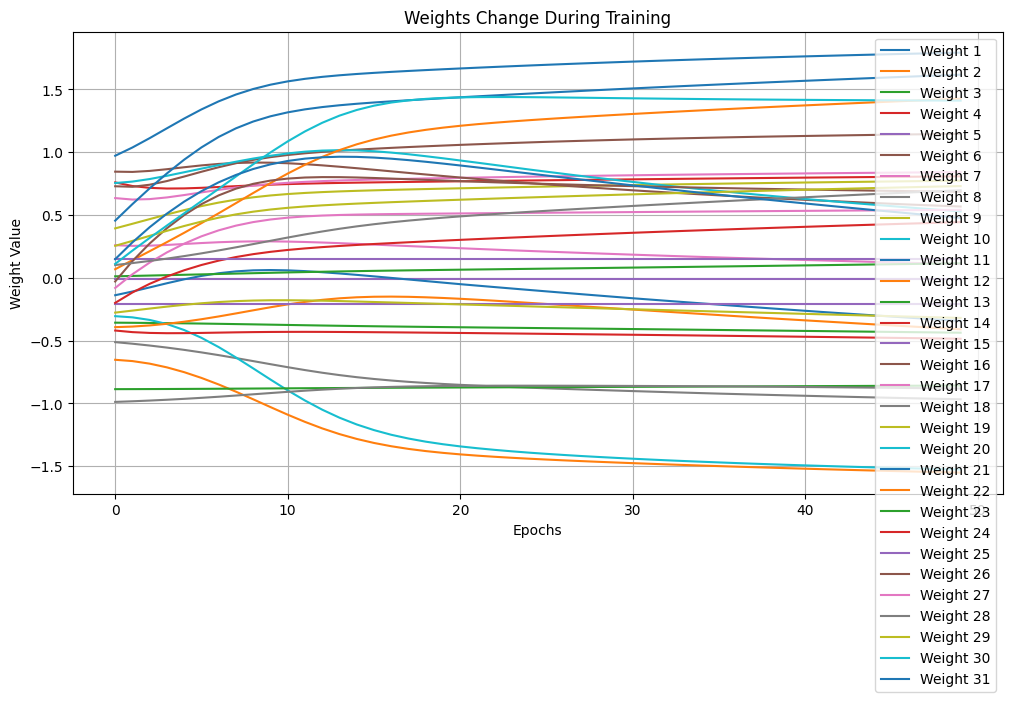

Training complete!


In [30]:

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 가상의 이차 함수 데이터 생성
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 1 + 2 * X**2 + np.random.randn(100, 1) * 0.5  # y = 1 + 2x^2 + 노이즈

# 입력 데이터와 타깃 데이터를 텐서로 변환
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# 간단한 이차 함수 모델 정의 (다항 회귀)
class SimpleQuadraticRegression(nn.Module):
    def __init__(self):
        super(SimpleQuadraticRegression, self).__init__()
        self.linear1 = nn.Linear(1, 10)  # 첫 번째 레이어
        self.linear2 = nn.Linear(10, 1)   # 출력 레이어

    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

# 모델 초기화
model = SimpleQuadraticRegression()

# 손실 함수 정의 (평균 제곱 오차)
loss_fn = nn.MSELoss()

# 옵티마이저 정의 (확률적 경사 하강법 SGD)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 가중치 변화 기록을 위한 리스트
weight_history = []

# 반복 횟수 설정
epochs = 50
for epoch in range(epochs):
    # Forward pass: 모델을 통해 예측값 계산
    y_pred = model(X_tensor)
    
    # 손실 계산
    loss = loss_fn(y_pred, y_tensor)
    
    # Backward pass: 기울기 계산 및 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 현재의 가중치 기록
    with torch.no_grad():  # 텐서의 기울기 추적을 비활성화
        weights = [p.numpy().flatten() for p in model.parameters()]  # 1차원으로 변환하여 저장
        weight_history.append(np.concatenate(weights))  # 가중치 리스트를 연결하여 저장

    # 현재의 손실 출력
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# 가중치 변화 그래프 그리기
weight_history = np.array(weight_history)
plt.figure(figsize=(12, 6))

# 각 가중치의 변화를 시각화
for i in range(weight_history.shape[1]):
    plt.plot(weight_history[:, i], label=f'Weight {i + 1}')

plt.title('Weights Change During Training')
plt.xlabel('Epochs')
plt.ylabel('Weight Value')
plt.legend()
plt.grid()
plt.show()

print("Training complete!")


즉 다시 정리해볼게 내가
랜덤으로 설정된 행렬 가중치에서 기본적으로 반복되는 오차의 의해 구해지는 미분값은 그저 하나의 가중치가 오차에 주는 영향도를 나타내는데 우리가 세운 가중치 업데이트 식에 따라 가중치가 조정이 되면서 오차가 줄어든것이다  여기서 오차가 줄어들지 않고 튀어 오르는 경우는 가중치를 업데이트하는 식 자체에 문제가 있어서 파라미터 에타 같은것에 문제 있을 수 있다 이렇게 이해하면 되지? 그리고 일정 수준에서 수치가 더 좋아지지 않는건 가중치의 갯수가 부족 이렇게 이해도 할 수 있지?

## 1. 미분값의 역할
    - 미분값은 각 가중치가 손실(오차)에 미치는 영향력을 나타냅니다. 즉, 가중치를 조금 변화시켰을 때 손실이 얼마나 변하는지를 나타내는 지표입니다. 이 미분값을 기반으로 가중치가 업데이트됩니다.
## 2. 가중치 업데이트의 의미
    - 가중치 업데이트는 미분값을 사용하여 손실을 줄이는 방향으로 가중치를 조정하는 과정입니다. 이 업데이트 과정이 성공적으로 이루어지면, 신경망의 예측 성능이 개선되고 손실이 줄어듭니다.
이때, **에타(η)**라고 불리는 학습률이 가중치 업데이트에서 중요한 역할을 합니다. 학습률이 너무 크거나 너무 작으면 가중치 업데이트가 제대로 이루어지지 않거나, 오히려 손실이 증가할 수 있습니다.
## 3. 오차가 줄어들지 않는 경우 
    - 오차가 줄어들지 않고 증가하는 경우는 학습률이 너무 크거나(즉, 가중치가 지나치게 크게 변경되어 손실이 오히려 커짐), 또는 학습률이 너무 작아서 충분히 최적화되지 못하는 경우일 수 있습니다.
이러한 상황에서는 학습률을 조정하거나, 가중치 업데이트 방식을 변경해야 합니다. 예를 들어, 학습률을 줄이거나 모멘텀, Adam과 같은 더 복잡한 최적화 기법을 사용하는 것이 도움이 될 수 있습니다.
## 4. 수렴하지 않는 경우
    - 손실이 일정 수준에서 더 이상 줄어들지 않는 경우는 몇 가지 이유가 있을 수 있습니다:
가중치의 수가 부족해서 신경망이 복잡한 패턴을 충분히 학습하지 못하고 있는 경우입니다. 이 경우, **신경망의 크기(즉, 레이어나 뉴런의 수)**를 늘려서 모델이 더 복잡한 패턴을 학습할 수 있도록 해야 합니다.
학습률이 너무 낮아 학습이 너무 느리게 진행되고 있는 경우일 수도 있습니다. 학습률을 적절히 조정해 볼 수 있습니다.
데이터의 복잡성에 비해 신경망의 구조가 단순한 경우입니다. 이 경우, 더 복잡한 신경망 구조를 도입하거나, 다른 유형의 신경망(예: 컨볼루션 신경망)을 시도해 볼 수 있습니다.


## 요약


미분값은 가중치가 손실에 미치는 영향을 나타내며, 이를 이용해 가중치를 업데이트하여 손실을 줄입니다.
오차가 줄어들지 않거나 튀어 오르는 경우는 주로 학습률이나 가중치 업데이트 방식에 문제가 있을 가능성이 큽니다.
손실이 일정 수준에서 더 이상 개선되지 않는 경우는 신경망의 크기(가중치 수)가 부족하거나, 학습률이 너무 낮아서 학습이 충분히 이루어지지 않는 상황일 수 있습니다.
이러한 이해를 바탕으로 신경망을 최적화하고 개선할 수 있습니다.







